In [ ]:
# importa biblioteca matplotlib
import matplotlib.pyplot as plt

# importa biblioteca pandas
import pandas as pd

!pip install factor_analyzer
# importa a  biblioteca factor_analyzer
from factor_analyzer import FactorAnalyzer

!pip install factor_analyzer

# local do arquivo
Caminho='/content/Base de dados (1).xlsx'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=359e979097dba4768e183327c3e272b5e12725c365b6cbb7841b5c6c22be5635
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
 #Traz o arquivo para o Python
df=pd.read_excel(Caminho)
df.head()

,Country,Region,Rank 2019,Score 2019,GDP 2019,Family 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
0,Afghanistan,Southern Asia,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
1,Albania,Central and Eastern Europe,107,4.719,0.947,0.848,0.874,0.383,0.027,0.178
2,Algeria,Middle East and Northern Africa,88,5.211,1.002,1.160,0.785,0.086,0.114,0.073
3,Argentina,Latin America and Caribbean,47,6.086,1.092,1.432,0.881,0.471,0.050,0.066
4,Armenia,Central and Eastern Europe,116,4.559,0.850,1.055,0.815,0.283,0.064,0.095


In [ ]:
df = df.rename(columns={ 'Region':'Região', 'Rank 2019': 'Ranking','Score 2019':'Score','GDP 2019':'PIB per capita','Family 2019': 'Família','Life Expectancy 2019': 'Expectativa de vida', 'Freedom 2019': 'Liberdade', 'Trust 2019': 'Confiança','Country': 'País', 'Generosity 2019': 'Generosidade'})

In [ ]:
del df['Ranking']

In [ ]:
X = df.iloc[:, 2:10]

In [ ]:

# Padronizar os dados
#Traz a ferramenta
from sklearn.preprocessing import MinMaxScaler

ampl=MinMaxScaler().fit_transform(X)


#Fazendo os cinco fatores
fa = FactorAnalyzer(n_factors=8, rotation='Varimax')
fa.fit(ampl)


FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [ ]:
#Mostrando os auto vetores
ev, v = fa.get_eigenvalues()
ev


array([3.81254416, 1.42713915, 0.61288527, 0.55630728, 0.26210292,
       0.17230612, 0.1567151 ])

In [ ]:

# Calcular os percentuais de variância explicada por cada fator
explained_variances = fa.get_factor_variance()

# Valores de Proportion Var
proportion_var = explained_variances[1]

# Valores de Proportion Var acumulado
proportion_var_cumulative = explained_variances[2]

print("Proportion Var por Fator:")
for i, (prop_var, prop_var_cum) in enumerate(zip(proportion_var, proportion_var_cumulative)):
    print(f"Fator {i+1}: Valor = {prop_var:.4f}, Acumulado = {prop_var_cum:.4f}")

Proportion Var por Fator:
Fator 1: Valor = 0.4580, Acumulado = 0.4580
Fator 2: Valor = 0.1514, Acumulado = 0.6094
Fator 3: Valor = 0.0638, Acumulado = 0.6732
Fator 4: Valor = 0.0191, Acumulado = 0.6923
Fator 5: Valor = 0.0072, Acumulado = 0.6995
Fator 6: Valor = 0.0048, Acumulado = 0.7043
Fator 7: Valor = 0.0000, Acumulado = 0.7043


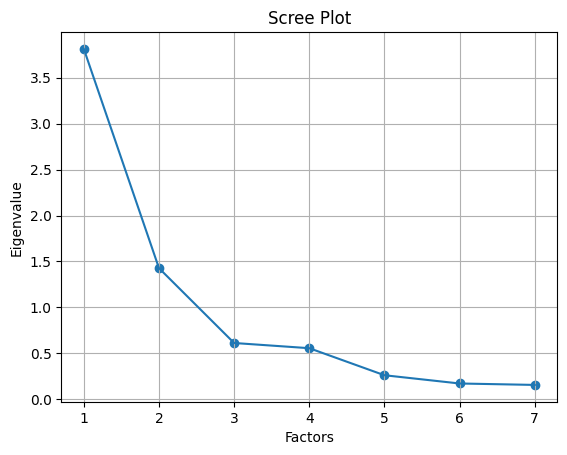

In [ ]:
#Verificando a quantidade de fatores pelo scatter plot
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [ ]:
#Refazendo para dois fatores
fa = FactorAnalyzer(n_factors=3, rotation='Varimax')
fa.fit(X)


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
#Matriz de cargas

L=pd.DataFrame(fa.loadings_)
L.index=X.columns
L.columns=('Fator1', 'Fator2','Fator3')


# Fator 1: Desenvolvimento

In [ ]:
L.sort_values(by='Fator1',ascending=False)

,Fator1,Fator2,Fator3
PIB per capita,0.939639,0.054040,-0.125100
Expectativa de vida,0.876678,0.098632,-0.051354
Score,0.860357,0.279549,0.186575
Família,0.837005,0.020075,0.280473
Liberdade,0.410340,0.546934,0.326362
Confiança,0.253004,0.705221,-0.157167
Generosidade,-0.096671,0.516536,0.082708


# Fator 2: Liberdade e confiança

In [ ]:
L.sort_values(by='Fator2',ascending=False)

,Fator1,Fator2,Fator3
Confiança,0.253004,0.705221,-0.157167
Liberdade,0.410340,0.546934,0.326362
Generosidade,-0.096671,0.516536,0.082708
Score,0.860357,0.279549,0.186575
Expectativa de vida,0.876678,0.098632,-0.051354
PIB per capita,0.939639,0.054040,-0.125100
Família,0.837005,0.020075,0.280473


# Fator 3: Subdesenvolvimento e pouca qualidade de vida

In [ ]:
L.sort_values(by='Fator3',ascending=False)

,Fator1,Fator2,Fator3
Liberdade,0.410340,0.546934,0.326362
Família,0.837005,0.020075,0.280473
Score,0.860357,0.279549,0.186575
Generosidade,-0.096671,0.516536,0.082708
Expectativa de vida,0.876678,0.098632,-0.051354
PIB per capita,0.939639,0.054040,-0.125100
Confiança,0.253004,0.705221,-0.157167


In [ ]:
#é possível nomear os fatores com base na alocação de variáveis por fator por exemplo Fator1: Economico Fator2: Populacionais

In [ ]:
#verifica KMO desejável ser > 0.5
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8364480877374136

In [ ]:
#verifica MSA desejável ser > 0.5
kmo_all

array([0.85480093, 0.82733282, 0.87074561, 0.86162209, 0.82877887,
       0.75181163, 0.59643658])

In [ ]:

#Bartlett testa se a correlação entre as variáveis é 0. Desejo rejeitar
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value


(657.8740708429458, 1.0360547418489141e-125)